In [50]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import data
import model
from model.equivariant import all_rotoflips
from skimage.transform import resize
from skimage.exposure import equalize_hist

## Data visualization

In [2]:
torch.tensor(np.moveaxis(data.premade.preview[0][0], -1, 0)).unsqueeze(0).shape

torch.Size([1, 3, 96, 96])

all 8 rotoflips of example image


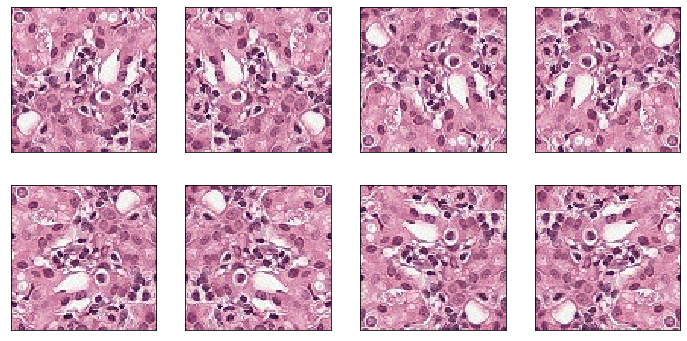

In [3]:
print('all 8 rotoflips of example image')
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
example_tensor = torch.tensor(np.moveaxis(data.premade.preview[0][0], -1, 0)).unsqueeze(0)
rotoflips = all_rotoflips(example_tensor)
for ax, rotoflip in zip([ax for ax_row in axes for ax in ax_row], rotoflips):
    ax.imshow(np.moveaxis(rotoflip.squeeze().numpy(), 0, -1))
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

## Network processing visualization

In [6]:
standard_model = model.Standard(load_from='./model/standard.pth')
equivariant_model = model.Equivariant(load_from='./model/equivariant.pth')

In [84]:
def plot_attention(model):
    so_far = example_tensor
    red = example_tensor[0, 0].detach().numpy()
    blue = example_tensor[0, 2].detach().numpy()
    
    fig, axes = plt.subplots(1, 3, figsize=(12, 16))
    ax_id = 0
    for layer in model.convolutional:
        so_far = layer(so_far)
        
        if layer.__class__ is torch.nn.ReLU:
            attention = (so_far[0] ** 2).mean(dim=0).detach().numpy()
            attention = resize(attention, red.shape)
            attention = equalize_hist(attention)
            plottable = np.moveaxis(np.stack((red, attention, blue)), 0, -1)
        
            axes[ax_id].set_xticks([])
            axes[ax_id].set_yticks([])
            axes[ax_id].imshow(plottable)
            ax_id += 1
            
    plt.show()

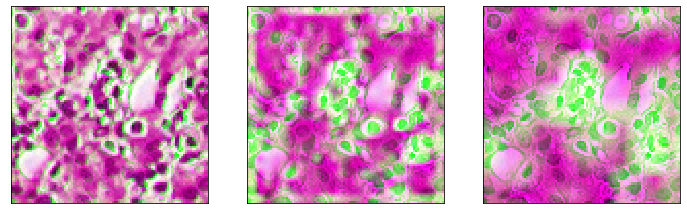

In [85]:
plot_attention(standard_model)

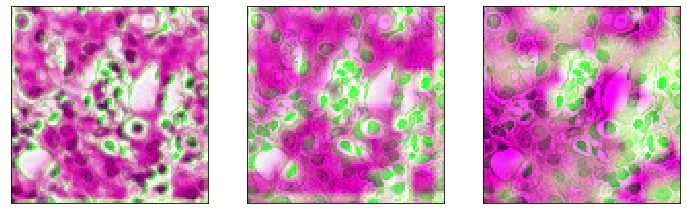

In [86]:
plot_attention(equivariant_model)